In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [2]:
#machine learning algos
#. sl - logistic regression, svm, Naive bayes, K- NN,
#Decision trees, Random forest
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.preprocessing import LabelEncoder
#importing library for train_test_split 
from sklearn.model_selection import train_test_split

#importing the libraries for perfromance metrics
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [4]:
#load the dataset into the dataframe
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


we can understand from the above output that we need to predict the survival of the person making the **survived column as target variable**

and columns where target variable depends on is  sex,age ,fare,sibsp,parch


something that is unique will not be usefull for ml training


In [7]:
#how many rows and columns are there 
df.shape

(891, 12)

In [8]:
#basic information of the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df[["Pclass", "Survived"]].head()


,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0


In [10]:
df.pivot_table(values="Survived", index="Pclass", aggfunc=["sum", "count", "mean"])


,sum,count,mean
,Survived,Survived,Survived
Pclass,,,
1,136,216,0.629630
2,87,184,0.472826
3,119,491,0.242363


In [11]:
df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [12]:
X= df[["Pclass","Age","Sex","SibSp","Parch","Fare"]]
y = df["Survived"]

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   Sex     891 non-null    object 
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


missing value in age column?

In [14]:
X['Age'] = X["Age"].fillna(X["Age"].mean())

/tmp/ipykernel_35/391487055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = X["Age"].fillna(X["Age"].mean())


In [15]:

X.isnull().sum()
#df.isnull().sum()

Pclass    0
Age       0
Sex       0
SibSp     0
Parch     0
Fare      0
dtype: int64

categorical data is what the ml cant work with so we encode it

label encoding
one - hot encoding
target encoding

In [16]:
#label encoding - 1 to male,0 to female
encoder = LabelEncoder()
X["Sex"] =encoder.fit_transform(X["Sex"])

/tmp/ipykernel_35/1073655277.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"] =encoder.fit_transform(X["Sex"])


In [22]:
import joblib
joblib.dump(encoder, "encoder.pkl")

['encoder.pkl']

In [17]:
X.head()

,Pclass,Age,Sex,SibSp,Parch,Fare
0,3,22.0,1,1,0,7.2500
1,1,38.0,0,1,0,71.2833
2,3,26.0,0,0,0,7.9250
3,1,35.0,0,1,0,53.1000
4,3,35.0,1,0,0,8.0500


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [19]:
# a dictionary of models for model setup
models = {
    "Logistic Regression" : LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "K-nearest Neighbors":KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

📊 Summary of Model Performance:

                    Model  Accuracy  Precision    Recall   f1Score
0     Logistic Regression  0.798883   0.768116  0.726027  0.746479
1  Support Vector Machine  0.653631   0.677419  0.287671  0.403846
2             Naive Bayes  0.759777   0.734375  0.643836  0.686131
3     K-nearest Neighbors  0.715084   0.689655  0.547945  0.610687
4           Random Forest  0.770950   0.796296  0.589041  0.677165


<Figure size 1200x600 with 0 Axes>

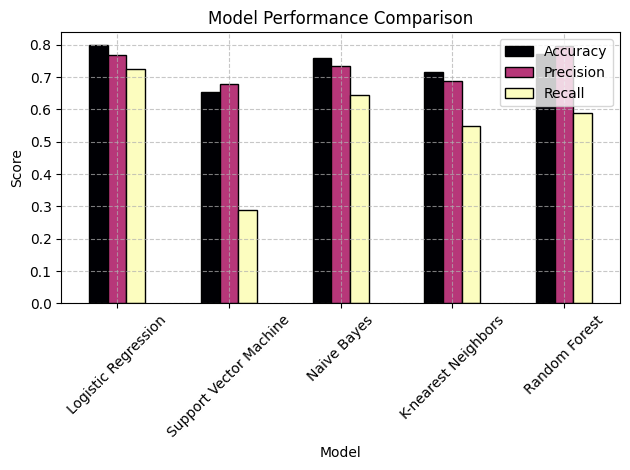

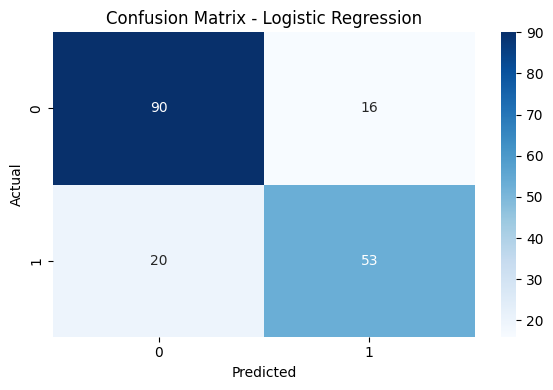

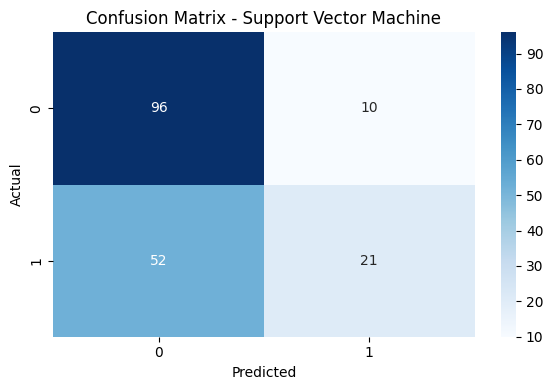

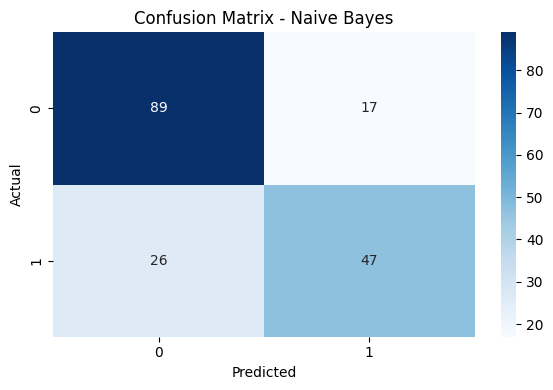

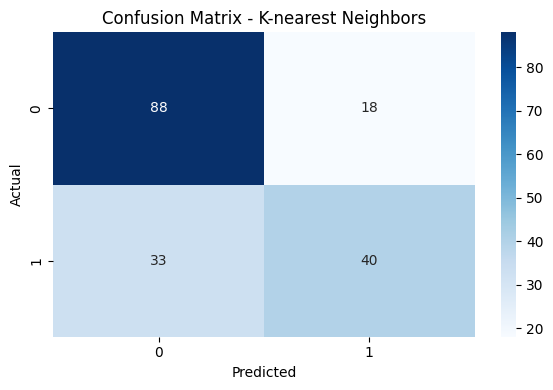

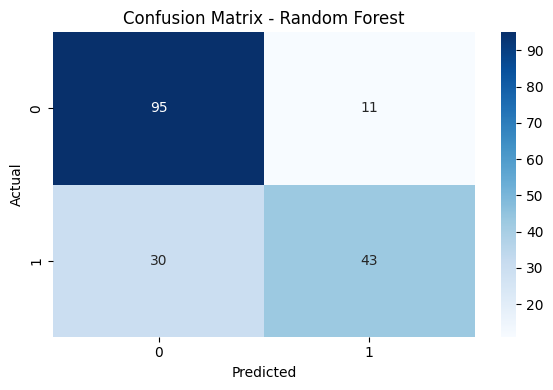

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Dictionary of models: e.g. {'Logistic Regression': LogisticRegression(), ...}
results = []
conf_matrices = {}

# Train & evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "f1Score": f1
    })

    # Save confusion matrix
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("📊 Summary of Model Performance:\n")
print(results_df)

# 🔍 Plot 1: Performance Metrics Bar Chart
plt.figure(figsize=(12, 6))
results_df.set_index("Model")[["Accuracy", "Precision", "Recall"]].plot(kind="bar", cmap="magma", edgecolor='black')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 🔍 Plot 2: Confusion Matrices (one per model)
for model_name, cm in conf_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


In [23]:
joblib.dump(model, "titanic_model.pkl")

['titanic_model.pkl']